James Telzrow \
2023-05-23 \
Warburton Lab \
Schrodinger Time Independent Particle In Box

## Introduction

This notebook describes several methods for numerically solving second order linear ordinary differential equations, using the *Time-independent Schrodinger equation* as an example.
It also quickly exemplifies the use of SciPy's [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) function for doing the same.
If you aren't interested in the details of these numerical methods or the reasoning behind them and you just want to know how to use them, then scroll down to the section labeled **SciPy's Runge-Kutta implementation**.

Suppose there exists a particle in a one-dimensional box on the real line.
Let this box be bounded on the left by $0$, and bounded on the right by some number $L$.
Let the particle have mass $m$, a definite quantity of energy $E$, and potential energy $V(x)$ that is equal to zero on $(0, L)$ and equal to $\infty$ everywhere else.
Then this particle's wave functions $\psi(x)$ are those that satisfy the *Time-independent Schrodinger equation*:
$$
\begin{equation*}
E\psi(x) = -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x)
\end{equation*}
$$
where $\hbar$ is the reduced Planck constant, $\hbar = \frac{h}{2\pi}$.

Because the particle cannot leave the box, $|\psi(x)|^2 = 0$ must be true for all $x$ not in the interval $(0, L)$.
Additionally, we are given that the potential energy of the particle is zero within the box (on the interval $(0, L)$).
We wish to solve for the continuous wave function, $\psi(x)$, on the interval $(0, L)$.
To do this, we begin by setting up the following differential equation:
$$
E\psi(x) = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)
$$
Now consider the particle's total energy $E$, and recall three facts:
1. Every particle can be represented as a wave with a frequency $\omega$ and a wavenumber $k$.
2. The total energy of a particle equals the reduced Planck constant times its wavelength: $E = \hbar\omega$.
3. The momentum of a particle, $p$, equals the reduced Planck constant times its wavenumber: $p = \hbar k$.
Now recall that the total energy of this particle is the sum of its kinetic and potential energy.
But within this box, it has no potential energy, meaning its total energy equals its kinetic energy.
Therefore, letting $v$ denote the particle's velocity, the total energy $E$ is given by
$$
E = \frac{1}{2}mv^2 + 0 = \frac{p^2}{2m} = \frac{\hbar^2 k^2}{2m}
$$
We substitute this expression for $E$ in the equation above:
$$
\frac{\hbar^2k^2}{2m}\psi(x) = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x) \rightarrow
-k^2 \psi(x) = \frac{d^2}{dx^2}\psi(x)
$$
This is a linear second-order ordinary differential equation, which can be easily solved analytically.
However, there are many types of differential equations that cannot be sovled analytically, and must instead be solved numerically.
To exemplify some methods of finding numerical solutions, we will use them to solve the equation above.

## Numerical Solutions

### Euler's Method

There are many methods of numerically solving differential equations, the simplest of which is Euler's method.
Euler's method is derived from the definition of the derivative:
recall that for a differentiable function $f(x)$ that maps a real number $x$ to another real number, the derivative of $f$ at the point $x_0$ equals:
$$
\frac{d}{dx}f(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$
This means that, using some fixed number $h^*$ that is arbitrarily small in magnitude, we can approximate the derivative of $f$ at $x_0$:
$$
\frac{d}{dx}f(x_0) \approx \frac{f(x_0 + h^*) - f(x_0)}{h^*}
$$
and the error of this magnitude generally decreases as we choose smaller values for $h^*$.
By rearranging this equation, we obtain
$$
\bigg(\frac{d}{dx}f(x_0)\bigg)h^* + f(x_0) \approx f(x_0 + h^*)
$$
This formula allows us to approximate the value of $f(x)$ at a point near $x_0$, using only the value of $f(x)$ and $\frac{d}{dx}f(x)$ at $x_0$.
Now suppose we let $x_1 = x_0 + h^*$, meaning that
$$
f(x_1) \approx \bigg(\frac{d}{dx}f(x_0)\bigg)h^* + f(x_0)
$$
Using this approximation and the formula above, we can approximate the value of $f(x_1 + h_*) = f(x_0 + 2h_*) = f(x_2)$.
Using this approximation for $f(x_2)$ and the formula above, we can approximate the value of $f(x_2 + h_*) = f(x_1 + 2h_*) = f(x_0 + 3h_*)  = f(x_3)$.
By continuing with this process, we can approximate the value of $f(x)$ at as many points as we desire.
However, note that we are **approximating** the value of $f(x)$: our approximation may underestimate or overestimate the true value of $f(x)$ by some margin of error.
Additionally, note that our approximation of $f(x_i) = f(x_{i-1} + h^*)$ depends on our approximation of $f(x_{i-1})$, which in turn depends on our approximation of $f(x_{i-2})$, and so on.
Because of this, the error in our approximations may increase as we compute more of them, and this increase may occur very quickly and be of very large magnitude.
We can try to minimize this error accumulation by choosing a sufficiently small value of $h^*$, but the time and space necessary to compute a solution increases as the magnitude of $h^*$ decreases.
Thus, although Euler's method is simple to understand and compute, it sometimes produces very inaccurate approximations.

Recall the differential equation given above:
$$
\begin{equation}
\frac{d^2}{dx^2}\psi(x) = -k^2 \psi(x)
\end{equation}
$$
Suppose we know the value of $\psi(x)$ and the value of $\frac{d}{dx}\psi(x)$ at the point $x_0 = 0$, and we wish to approximate $\psi(x)$ on the interval $(0, L)$.
We let $\Delta x$ be some fixed small positive number much smaller than $L$, and we try to use Euler's method:
$$
\psi(x_1) = \psi(x_0 + \Delta x) \approx \psi(x_0) + \Delta x \frac{d}{dx}\psi(x_0)
$$
We can easily compute this, because we know the values of $\psi(x_0)$, $\Delta x$ and $\frac{d}{dx}\psi(x_0)$.
Now we try to approximate $\psi(x_2) = \psi(x_1 + \Delta x)$:
$$
\begin{equation} \tag{2}
\psi(x_2) = \psi(x_1 + \Delta x) \approx \psi(x_1) + \Delta x \frac{d}{dx}\psi(x_1)
\end{equation}
$$
We have now encountered a problem: we know the value of $\Delta x$ and we have an approximation for $\psi(x_1)$, but do not know the value of $\frac{d}{dx}\psi(x_1)$.
Thus, we cannot compute our approximation for $\psi(x_2)$.
To fix this, we wish for a method of computing $\frac{d}{dx}\psi(x_1)$ using only what we know:
1. our initial values $\psi(0)$ and $\frac{d}{dx}\psi(0)$
2. our differential equation $\frac{d^2}{dx^2}\psi(x) = -k^2 \psi(x)$.

Note that (assuming $\psi(x)$ is twice-differentiable on $(0, L)$) the function $\frac{d}{dx}\psi(x)$ is yet another differentiable function.
This means that, if we know the values $\frac{d}{dx}\psi(x_0)$ and $\frac{d^2}{dx^2}\psi(x_0)$, we can approximate the value of $\frac{d}{dx}\psi(x)$ at $x_1 = x_0 + \Delta x$:
$$
\begin{equation} \tag{3}
\frac{d}{dx}\psi(x_1) \approx \frac{d}{dx}\psi(x_0) + \Delta x \frac{d^2}{dx^2}\psi(x_0)
\end{equation}
$$
We aren't given the value of $\frac{d^2}{dx^2}\psi(x_0)$.
However, by (1), we know that $\frac{d^2}{dx^2}\psi(x_0) = -k^2 \psi(x_0)$.
Thus by substitution, (3) becomes
$$
\begin{equation} \tag{4}
\frac{d}{dx}\psi(x_1) \approx \frac{d}{dx}\psi(x_0) + \Delta x (-k^2) \psi(x_0)
\end{equation}
$$
We know the values of $\frac{d}{dx}\psi(x_0)$, $\Delta x$, $k$ and $\psi(x_0)$, so we can compute this approximation for $\frac{d}{dx}\psi(x_1)$.
And now that we have this approximation for $\frac{d}{dx}\psi(x_1)$, we can use (2) to compute $\psi(x_2)$.
Additionally, using the same substitution we applied to (3), we can use our approximate values for $\frac{d}{dx}\psi(x_1)$ and $\psi(x_1)$ to compute an approximation for the value of $\frac{d}{dx}\psi(x_2)$.
Then, we can use these approximations of $\psi(x_2)$ and $\frac{d}{dx}\psi(x_2)$ to compute approximations of $\psi(x_3)$ and $\frac{d}{dx}\psi(x_3)$ (with $x_3 = x_2 + \Delta x$) and so on, repeating this process $\lfloor \frac{L}{\Delta x} \rfloor$ times, at which point we will have approximated $\psi(x)$ on the entire interval $(0, L)$.

In this scenario, Schrodinger's equation can be solved analytically, and the solutions are of the form 
$$
\psi_n(x) = A\sin(\frac{\pi n x}{L})
$$
where $n$ is a positive integer corresponding to one of the discrete energy levels in which the particle can exist, and $A$ is a possibly complex constant such that $|A| = \sqrt{\frac{2}{L}}$.
(Note that this requirement for the value of $A$ comes from the fact that $|\psi_n(x)|^2$ is a probability density function for the location of the particle in the box and thus $\int_0^L |\psi_n(x)|^2 dx$ must equal 1.)
For simplicity, let $A$ be the positive real number $\sqrt{\frac{2}{L}}$, and let's consider our analytic solution at the energy level $n = 1$:
$$
\psi_1(0) = \sqrt{\frac{2}{L}}\sin(\frac{\pi * 0}{L}) = 0, \hspace{5mm}
\frac{d}{dx}\psi_1(0) = \sqrt{\frac{2}{L}}\cos(\frac{\pi * 0}{L})\frac{\pi}{L} = \frac{\pi}{L}\sqrt{\frac{2}{L}}
$$
In the process of solving analytically, we also discover that $k$ must equal $\frac{n\pi}{L}$.

With  all this in mind, let's examine how well Euler's method approximates that true analytical solution $\psi_1(x)$ on the interval $(0, 1)$ (meaning that $L = 1$), given the initial conditions $\psi(0) = 0$, $\frac{d}{dx}\psi(0) = \frac{\pi}{L}\sqrt{\frac{2}{L}} = \frac{\pi}{1}\sqrt{\frac{2}{1}}= \pi\sqrt{2}$, and letting $k = \pi$ and $\Delta x = 0.0001$.
(In order to use Euler's method, we must have accurate values for our initial conditions, otherwise the resulting numerical solution could be a **very** poor approximation of the actual solution.
Since in this scenario we can use the analytical solution to determine these values, we do so in this example.)
The code below numerically solves for $\psi(x)$ using Euler's method and the values given above, and then plots both the resulting numerical solution and the true analytic solution for comparison.


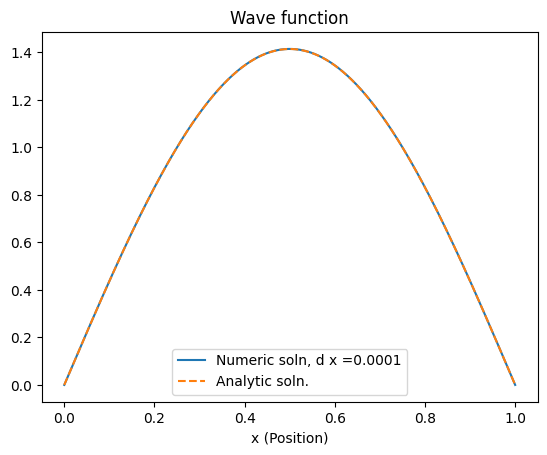

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin, sqrt

L_value = 1
k = pi/L_value
delta_x = 0.0001

# Specify initial conditions
psi_of_zero = 0
d_dx_psi_of_zero = (pi/L_value)*sqrt(2/L_value)


def d2_dx2_psi(psi_val: float) -> float:
    # Equation (1) given above
    return -1*k**2*psi_val


def true_psi(x_val: float) -> float:
    # Analytical solution
    return sqrt(2/L_value) * sin(pi * x_val / L_value)


# Vectorized true_psi for fast computation with numpy
vect_true_psi = np.vectorize(true_psi)


def plot_true_psi(start: float, end: float, delta_x: float):
    # Plots the true solution on the interval (start, end), evaluating
    # at points in increments of delta_x
    x_vals = np.arange(start, end, delta_x)
    true_psi_vals = vect_true_psi(x_vals)
    plt.plot(x_vals, true_psi_vals, label='Analytic soln.', linestyle='dashed')


def plot_euler(start: float, end: float, delta_x: float):
    # Computes and plots a numeric solution using Euler's method on the
    # interval (start, end), evaluating at points in increments of
    # delta_x
    x_vals = np.arange(start, end + delta_x, delta_x)
    psi_vals = np.zeros_like(x_vals)
    d_dx_psi_vals = np.zeros_like(x_vals)
    # Specify initial conditions
    psi_vals[0] = psi_of_zero
    d_dx_psi_vals[0] = d_dx_psi_of_zero
    for index, x_value in enumerate(x_vals[1:], start=1):
        # Perform Euler's method
        psi_vals[index] = psi_vals[index-1] + delta_x*d_dx_psi_vals[index-1]
        d_dx_psi_vals[index] = d_dx_psi_vals[index-1] + \
            delta_x*d2_dx2_psi(psi_vals[index-1])
    plt.plot(x_vals, psi_vals, label='Numeric soln, d x =' + str(delta_x))


plot_euler(0, L_value, delta_x)
plot_true_psi(0, L_value, 0.0001)
plt.xlabel('x (Position)')
plt.title('Wave function')
plt.legend()


In this example, our numeric solution approximates the true analytic solution very well.
However, we used a fairly small step side ($\Delta x = 0.0001$) relative to the length of our interval ($L - 0 = 1 - 0 = 1$), meaning that we performed $\frac{1}{0.0001} - 1 = 9999$ iterations while solving.
Perhaps we wish to speed up the process of solving by choosing a larger value of $\Delta x$.
Let's explore how this affects the accuracy of our solution, by repeating the computation above for $\Delta x = 0.001, 0.01$ and $0.1$.
(If you wish, you can change the values in the array named `delta_x_vals` and see how this affects the result.)

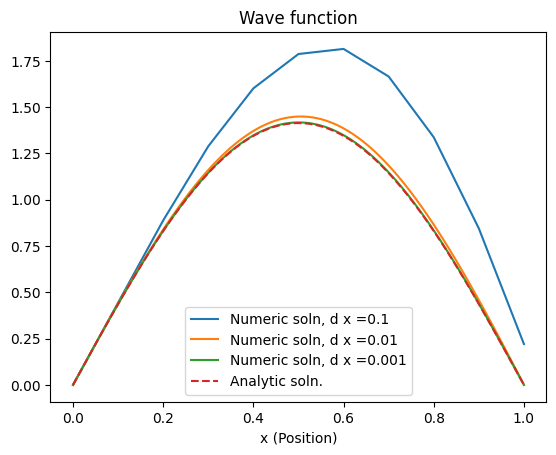

In [12]:
delta_x_vals = [0.1, 0.01, 0.001]

for delta_x in delta_x_vals:
    plot_euler(0, L_value, delta_x)

plot_true_psi(0, L_value, 0.0001)
plt.xlabel('x (Position)')
plt.title('Wave function')
plt.legend()


Clearly, the accuracy of the numerical solution improves significantly as the magnitude of $\Delta x$ decreases.

Now let's use Euler's method to numerically solve Schrodinger's equation for the higher-energy levels $n = 2$ and $n = 3$ and then plot these solutions and their analytic counterparts with $\Delta x = 0.0001$.

For $n = 2$, (recalling that $L = 1$) our initial conditions are as follows:
$$
\psi_2(0) = \sqrt{\frac{2}{L}}\sin(\frac{2\pi 0}{L}) = 0, \hspace{5mm} \frac{d}{dx}\psi_2(0) = \sqrt{\frac{2}{L}}\cos(\frac{2\pi 0}{L})\frac{2\pi}{L} = 2\pi\sqrt{2}
$$
and $k = 2\pi$.

For $n = 3$, our initial conditions are as follows:
$$
\psi_3(0) = \sqrt{\frac{2}{L}}\sin(\frac{3\pi 0}{L}) = 0, \hspace{5mm} \frac{d}{dx}\psi_3(0) = \sqrt{\frac{2}{L}}\cos(\frac{3\pi 0}{L})\frac{3\pi}{L} = 3\pi\sqrt{2}
$$
and $k = 3\pi$.

Now recall from above that the energy $E$ of the particle equals $\frac{\hbar^2 k^2}{2m}$.
Additionally, in the process of analytically solving the Schrodinger equation in this scenario, it was discovered that $k = \frac{n\pi}{L}$ where $n$ may be any positive integer.
This means that $E = \frac{\hbar^2 \pi^2 n^2}{2m}$, and $E$ increases as $n$ increases.
In this way, each value of $n$ corresponds to a different quantity of energy $E_n$ and thus a different energy level at which the particle can exist.
To reflect this, and the fact that each energy level has a distinct corresponding wave function that is a solution to Schrodinger's equation, the code below calculates the quantity of energy (in Joules) that the particle posesses at each energy level, and vertically shifts the graph of the corresponding wave function by that amount, given the mass of the particle $m$ in kilograms.
(You can adjust the variable `m_val` to change the mass of the particle, you can change the contents of the `n_values` array to adjust the energy levels for which the equation is solved, you can specify the width of the box by changing the `L_val` variable, and you can adjust the `delta_x` variable to change the step size used.)

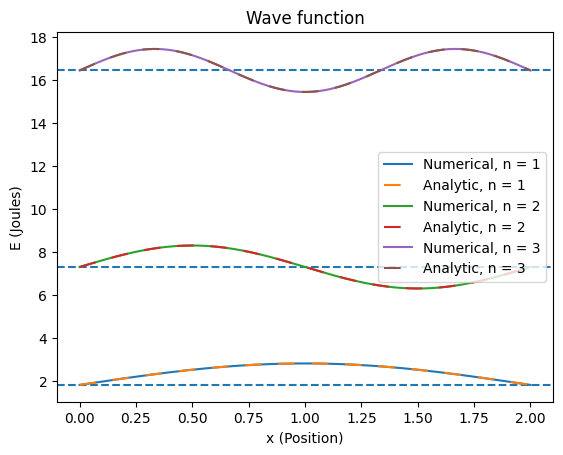

In [13]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np
import sympy as syp
from sympy import diff, lambdify, symbols

# Mass of the particle, in kilograms
m_val = 3e-68
n_values = [1, 2, 3]
L_val = 2
delta_x = 0.0001
# Reduced Planck Constant, in Joule seconds
hbar = 1.054_571_817e-34
L, m, n, x = symbols('L m n x')

E_n = hbar**2 * syp.pi**2 * n**2 / (2 * m)
psi_expr = syp.sqrt(2/L) * syp.sin(n*syp.pi * x / L)


def compute_psi(start, end, delta_x, n_val, L_val):
    # Return a tuple of arrays, the first being a range of x-values on
    # the interval (start, end) with a difference of delta_x between
    # successive values, and the second being the values of psi(x)
    # evaluated at those x-values, using the passed values for n and L
    lambdified_psi = lambdify(x, psi_expr.subs({L: L_val, n: n_val}), 'numpy')
    x_vals = np.arange(start, end + delta_x, delta_x)
    psi_vals = lambdified_psi(x_vals)
    return (x_vals, psi_vals)


def compute_euler(start, end, delta_x, psi_0, d_dx_psi_0, n_val, L_val):
    # Returns a tuple of arrays, the first being a range of x-values on
    # the interval (start, end) with a  difference of delta_x between
    # successive values, and the second being approximate values of
    # psi(x) at those  x-values, calculated using Euler's method with
    # the supplied initial conditions and values for n and L.
    x_vals = np.arange(start, end + delta_x, delta_x)
    psi_vals = np.zeros_like(x_vals)
    d_dx_psi_vals = np.zeros_like(x_vals)
    # Specify initial conditions
    psi_vals[0] = psi_0
    d_dx_psi_vals[0] = d_dx_psi_0
    for index, x_value in enumerate(x_vals[1:], start=1):
        # Perform Euler's method
        psi_vals[index] = psi_vals[index-1] + delta_x*d_dx_psi_vals[index-1]
        d_dx_psi_vals[index] = d_dx_psi_vals[index-1] + \
            delta_x*-(n_val * pi / L_val)**2 * (psi_vals[index-1])
    return (x_vals, psi_vals)


for n_val in n_values:
    # Compute initial conditions
    psi_0 = psi_expr.subs({L: L_val, n: n_val, x: 0}).evalf()
    d_dx_psi_0 = diff(psi_expr, x).subs({L: L_val, n: n_val, x: 0}).evalf()

    # Compute numerical solution
    x_for_euler, euler_vals = compute_euler(
        0, L_val, delta_x, psi_0, d_dx_psi_0, n_val, L_val)
    x_for_actual, actual_vals = compute_psi(0, L_val, delta_x, n_val, L_val)

    # Compute energy
    energy = E_n.subs({n: n_val, m: m_val}).evalf()
    np.add(euler_vals, energy, out=euler_vals, casting='unsafe')
    np.add(actual_vals, energy, out=actual_vals, casting='unsafe')

    # Plot what was computed
    plt.axhline(y=energy, linestyle='dashed')
    plt.plot(x_for_euler, euler_vals, label='Numerical, n = ' + str(n_val))
    plt.plot(x_for_actual, actual_vals, label='Analytic, n = ' +
             str(n_val), linestyle='--', dashes=(8, 8))

plt.xlabel('x (Position)')
plt.ylabel('E (Joules)')
plt.title('Wave function')
plt.legend()


### Heun's Method

As shown above, numerical solutions created using Euler's method may be very poor approximations of true solutions, unless a very small step size (i.e., value for $\Delta x$) is used.
However, decreasing the step size increases the time and space necessary to find numerical solutions.
Thus, we desire a method that is more accurate than Euler given the same step size.
To understand how we might improve upon Euler's method, let's take a closer look at the error that appears while using it.

Suppose we wish to numerically solve the first order linear differential equaiton $\frac{dy}{dx} = e^x$.
(Obviously, we can easily find analytically that the solution to this equation is $y = e^x$, but attempting to solve this simple differential equation numerically helps illustrate a technique that is more accurate than Euler's method.)
Suppose we are given the initial conditon $y(0) = 1$, and we use a step size $\Delta x = 1$.
Using Euler's method, we compute
$$
y(1) \approx (e^0 \times 1) + 1 = 2
$$
To consider the accuracy of this approximation, let's plot it along with the true analytical solution:

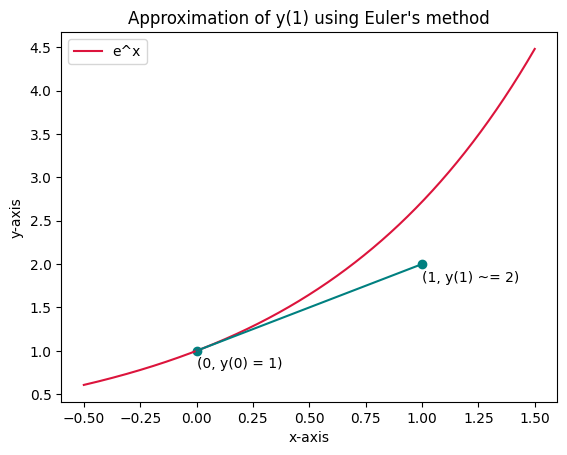

In [14]:
from sympy import exp, lambdify, Symbol

x = Symbol('x')
dy_dx = exp(x)
lambdified_dy_dx = lambdify(x, dy_dx, 'numpy')

start, end, delta_x = -0.5, 1.5, 1
x_vals = np.arange(start, end, 0.0001)
e_x = lambdified_dy_dx(x_vals)
y_0 = 1
y_1_approximation = 2

plt.plot(x_vals, e_x, label='e^x', color='crimson')
plt.scatter([0, 1], [y_0, y_1_approximation], color='teal')
plt.plot([0, 1], [y_0, y_1_approximation], color='teal')
plt.annotate('(0, y(0) = 1)', (0, y_0 - 0.2))
plt.annotate('(1, y(1) ~= 2)', (1, y_1_approximation - 0.2))

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Approximation of y(1) using Euler\'s method')
plt.legend()


This is not a very good approximation:
the relative error is $\frac{|1 - e^1|}{e^1} \approx 0.632$.
And because each approximation made using Euler's method depends on previous approximations, the numerical solution computed using the approach above will be very inaccurate after only a few iterations are completed.

Now suppose we are given $y(1) = e$, and we try to approximate $y(0)$.
We can do this using the formula
$$
y(0) \approx e^1\times (-1) + e = 0
$$
Let's plot this approximation along with the true analytical solution:

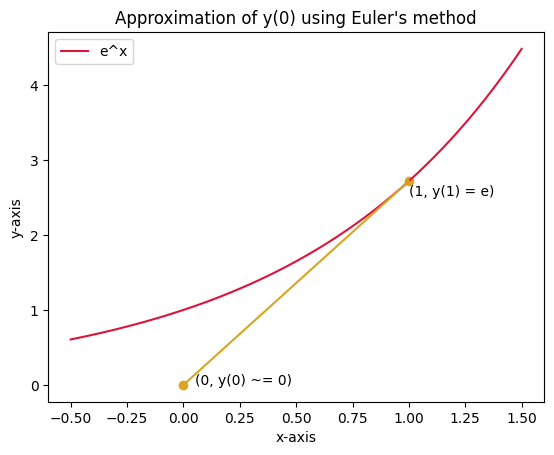

In [15]:
y_1 = exp(1).evalf()
y_0_approximation = 0

plt.plot(x_vals, e_x, label='e^x', color='crimson')
plt.scatter([1, 0], [y_1, y_0_approximation], color='goldenrod')
plt.plot([1, 0], [y_1, y_0_approximation], color='goldenrod')
plt.annotate('(1, y(1) = e)', (1, y_1 - 0.2))
plt.annotate('(0, y(0) ~= 0)', (0 + 0.05, y_0_approximation))

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Approximation of y(0) using Euler\'s method')
plt.legend()


This is also a poor approximation:
the relative error is $\frac{|0 - 1|}{1} = 1$.
Finally, let's consider a graph showing both of these approximations together:

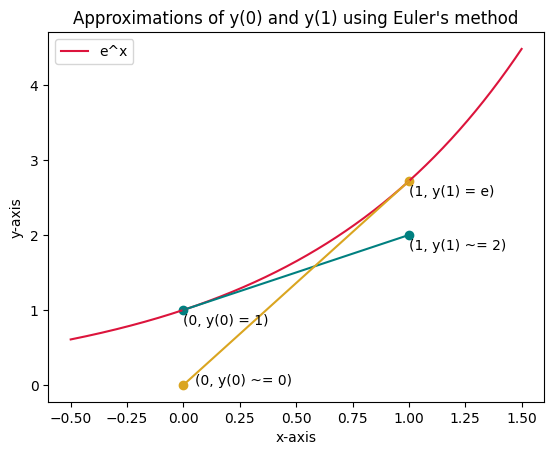

In [16]:
plt.plot(x_vals, e_x, label='e^x', color='crimson')
plt.scatter([0, 1], [y_0, y_1_approximation], color='teal')
plt.plot([0, 1], [y_0, y_1_approximation], color='teal')
plt.annotate('(0, y(0) = 1)', (0, y_0 - 0.2))
plt.annotate('(1, y(1) ~= 2)', (1, y_1_approximation - 0.2))
plt.scatter([1, 0], [y_1, y_0_approximation], color='goldenrod')
plt.plot([1, 0], [y_1, y_0_approximation], color='goldenrod')
plt.annotate('(1, y(1) = e)', (1, y_1 - 0.2))
plt.annotate('(0, y(0) ~= 0)', (0 + 0.05, y_0_approximation))

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Approximations of y(0) and y(1) using Euler\'s method')
plt.legend()


If we consider our approximation lines in comparison to the analytical solution, we see that our second approximation (the goldenrod line) is seemingly "too steep", whereas the first approximation (the teal line) is seemingly "not steep enough".

With this in mind, let's try to improve our approximation $y(1) \approx \frac{dy}{dx}(0) \times \Delta x + y(0)$ by replacing the $\frac{dy}{dx}(0)$ term with the average of the slopes of our two approximation lines.
The slopes of these lines are:
$$
\text{Slope}_{\text{first approximation}} = \frac{2 - 1}{1} = 1, \hspace{5mm} \text{Slope}_{\text{second approximation}} = \frac{e - 0}{1} = e
$$
meaning that their average is
$$
\text{Average}_{\text{slopes}} = \frac{1+e}{2}
$$
Let's compare our new approximation $y(1) \approx \big(\frac{1+e}{2}\big)\times 1 + 1$ to both the analytical solution and our approximation computed using an iteration of Euler's method:

In [17]:
y_1_improved_approx = (1+exp(1).evalf())/2 + 1
y_1_improved_approx


2.85914091422952

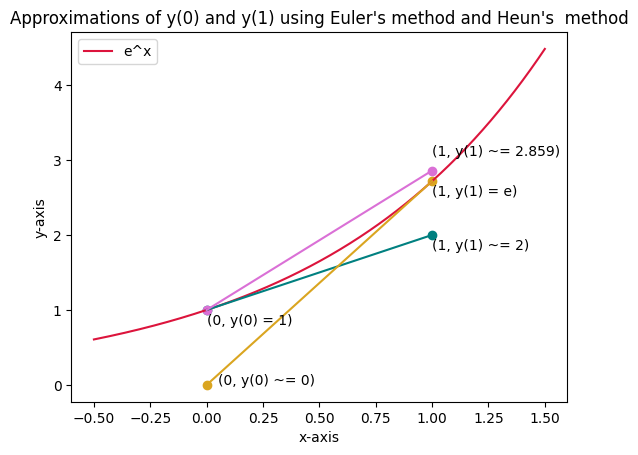

In [18]:
plt.plot(x_vals, e_x, label='e^x', color='crimson')
# Old approximation of y(1)
plt.scatter([0, 1], [y_0, y_1_approximation], color='teal')
plt.plot([0, 1], [y_0, y_1_approximation], color='teal')
plt.annotate('(0, y(0) = 1)', (0, y_0 - 0.2))
plt.annotate('(1, y(1) ~= 2)', (1, y_1_approximation - 0.2))

plt.scatter([1, 0], [y_1, y_0_approximation], color='goldenrod')
plt.plot([1, 0], [y_1, y_0_approximation], color='goldenrod')
plt.annotate('(1, y(1) = e)', (1, y_1 - 0.2))
plt.annotate('(0, y(0) ~= 0)', (0 + 0.05, y_0_approximation))

# Improved approximation of y(1)
plt.scatter([0, 1], [y_0, y_1_improved_approx], color='orchid')
plt.plot([0, 1], [y_0, y_1_improved_approx], color='orchid')
plt.annotate('(1, y(1) ~= 2.859)', (1, y_1_improved_approx + 0.2))

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Approximations of y(0) and y(1) using Euler\'s method and Heun\'s ' +
          ' method')
plt.legend()


As the graph above makes clear, this new approximation is much better than the other two:
the relative error is only $\frac{|2.859 - e|}{e} \approx 0.05$.
By using the average value of $\frac{dy}{dx}$ at the beginning and end of the $\Delta x$ interval, we have significantly improved the accuracy of our approximation realtive to Euler's method, without decreasing our step size (which would increase the time necessary to compute the numerical solution.)

This technique is known as Heun's method.
In general terms, it is as follows:

Suppose we are given the differential equation and initial condition
$$
y'(x) = f(x, y(x)), \hspace{5mm} y(x_0) = y_0
$$
we use a step size of $\Delta x$, and we denote $x_i = x_0 + i\times \Delta x$ and $y_i$ as our approximation of $y(x_i)$ for $i = 1, 2, 3, \dots$.
We would like to compute $y_{i+1}$ using the formula
$$
y_{i+1} = y_i + \frac{\Delta x}{2}\bigg( f(x_i, y_i) + f(x_{i+1}, y_{i+1}) \bigg)
$$
However, note that we are expressing the as-yet-unknown value $y_{i+1}$ as a function of itself.
This equation won't help us compute the as-yet-unknown value $y_{i+1}$.
So instead, we compute an initial estimate of $y_{i+1}$ using the familiar formula
$$
\tilde{y}_{i+1} = y_i + \Delta x (f(x_i, y_i))
$$
and then we compute a final estimate of $y_{i+1}$ using the formula
$$
y_{i+1} = y_i + \frac{\Delta x}{2}\bigg( f(x_i, y_i) + f(x_{i+1}, \tilde{y}_{i+1}) \bigg)
$$

Let's use Heun's method to numerically solve the Schrodinger equation for the scenario described earlier (the one-dimensional particle-in-a-box problem, with initial conditions $\psi(0) = 0, \frac{d}{dx}\psi(0) = \pi\sqrt{2}$, letting $n = 1$ and thus $k = \pi$ and using a step size of $\Delta x = 0.1$ on the interval $(0, 1)$.)
Initially, it may seem that we have a problem, because Heun's method numerically solves first-order differential equations, but in this scenario the Schrodinger equation is a second-order differential equation.
However, this isn't actually an issue at all:
we simply set up a system of two first-order differential equations:
$$
\psi(x_{i+1}) = \psi(x_i) + \frac{\Delta x}{2} \bigg( \frac{d\psi}{dx}(x_i) + \frac{d\psi}{dx}(x_{i+1}) \bigg)
$$
and
$$
\bigg(\frac{d\psi}{dx}(x_{i+1})\bigg) =  \bigg(\frac{d\psi}{dx}(x_i)\bigg) + \frac{\Delta x}{2} 
\bigg( \frac{d}{dx}\bigg(\frac{d\psi}{dx}(x_i)\bigg) + \frac{d}{dx}\bigg(\frac{d\psi}{dx}(x_{i+1})\bigg) \bigg) = \\
\frac{d\psi}{dx}(x_{i+1}) = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}\bigg(\frac{d^2\psi}{dx}(x_i) + \frac{d^2\psi}{dx}(x_{i+1})\bigg) = \\
\frac{d\psi}{dx}(x_{i+1}) = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}\bigg(-k^2\psi(x_i) + -k^2\psi(x_{i+1})\bigg)
$$
and then insist that we are given an initial value not only for $\psi(x)$ but also for $\frac{d\psi}{dx}(x)$.

So in order to perform an iteration of Heun's method, first we compute
$$
\overline{\psi(x_{i+1})} = \psi(x_i) + \Delta x \frac{d\psi}{dx}(x_i)
$$
and then we compute
$$
\overline{\frac{d\psi}{dx}(x_{i+1})} = \frac{d\psi}{dx}(x_i) + \Delta x \frac{d^2\psi}{dx^2}(x_i) = 
\frac{d\psi}{dx}(x_i) + \Delta x (-k^2)\psi(x_i)
$$
Then using these initial approximations, we compute our final approximations:
$$
\psi(x_{i+1}) = \psi(x_i) + \frac{\Delta x}{2} \bigg( \frac{d\psi}{dx}(x_i) + \overline{\frac{d\psi}{dx}(x_{i+1})} \bigg)
$$
and
$$
\frac{d\psi}{dx}(x_{i+1}) = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}(-k^2\psi(x_i) + -k^2\overline{\psi(x_{i+1})})
$$

The code below computes the numeric solution using Heun's method and plots the result.
It also plots the analytic solution and the numeric solution previously computed using Euler's method, so that we may compare the accuracy of these methods.
(You can adjust the `n_val` variable to change the energy level for which the solution is computed, you can adjust the width of the box using the `L_val` variable, and you can adjust the step size of the solution using the `delta_x` variable.)

In [19]:
def compute_heun(start, end, delta_x, psi_0, d_dx_psi_0, n_val, L_val):
    x_vals = np.arange(start, end + delta_x, delta_x)
    psi_vals = np.zeros_like(x_vals)
    d_dx_psi_vals = np.zeros_like(x_vals)

    psi_vals[0] = psi_0
    d_dx_psi_vals[0] = d_dx_psi_0

    for index, x_value in enumerate(x_vals[1:], start=1):
        neg_k_val_sq = -(n_val * pi / L_val)**2
        init_psi_approx = psi_vals[index-1] + delta_x*d_dx_psi_vals[index-1]
        init_d_dx_psi_approx = d_dx_psi_vals[index-1] + \
            delta_x * neg_k_val_sq * psi_vals[index-1]

        fin_psi_approx = psi_vals[index-1] + \
            (delta_x/2)*(d_dx_psi_vals[index-1] + init_d_dx_psi_approx)
        fin_d_dx_psi_approx = d_dx_psi_vals[index-1] + (delta_x/2)*(
            neg_k_val_sq * psi_vals[index-1] + neg_k_val_sq * init_psi_approx)

        psi_vals[index] = fin_psi_approx
        d_dx_psi_vals[index] = fin_d_dx_psi_approx
    return (x_vals, psi_vals)


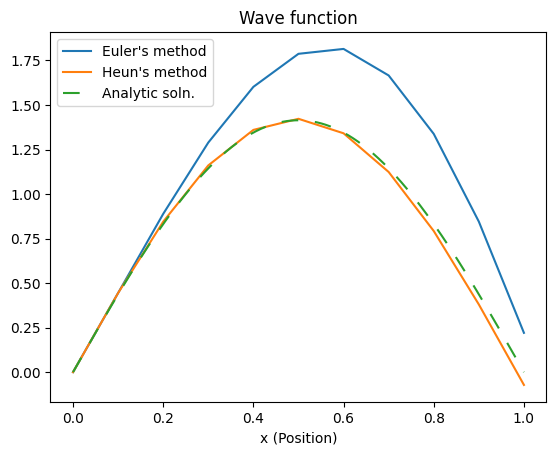

In [20]:
n_val = 1
L_val = 1
delta_x = 0.1
delta_x_for_actual = 0.0001

psi_0 = psi_expr.subs({L: L_val, n: n_val, x: 0}).evalf()
d_dx_psi_0 = diff(psi_expr, x).subs({L: L_val, n: n_val, x: 0}).evalf()

x_for_euler, euler_vals = compute_euler(
    0, L_val, delta_x, psi_0, d_dx_psi_0, n_val, L_val)
x_for_heun, heun_vals = compute_heun(
    0, L_val, delta_x, psi_0, d_dx_psi_0, n_val, L_val)
x_for_actual, actual_vals = compute_psi(
    0, L_val, delta_x_for_actual, n_val, L_val)

plt.plot(x_for_euler, euler_vals, label='Euler\'s method')
plt.plot(x_for_heun, heun_vals, label='Heun\'s method')
plt.plot(x_for_actual, actual_vals, label='Analytic soln.',
         linestyle='--', dashes=(8, 8))

plt.xlabel('x (Position)')
plt.title('Wave function')
plt.legend()


As this graph demonstrates, even with a step size as relatively large as $\Delta x = 0.1$, Heun's method is significantly more accurate than Euler's method.

### Runge-Kutta Method

Recall the example above in which we approximated the value $y(1)$ for the differential equation $\frac{dy}{dx} = e^x$ using an iteration of Heun's method, given the initial condition $y(0) = 1$.
With a relative error of approximately $0.05$, Heun's method can still be improved upon, even though it is much more accurate than Euler's method.
To gain this improvement in accuracy, we used the average of the values of $\frac{dy}{dx}$ at both $x = 0$ and $x = 1$.
Thus, it may be possible to design a method even more accurate than Heun's, by using the average of the value of $\frac{dy}{dx}$ at more points in the interval $[x_0, x_1] = [0, 1]$.
Let's try it out.

Suppose we wish to numerically solve the first order linear differential equation $\frac{dy}{dx}(x) = (x+1)y(x)$.
(Once again, it is easy to find the analytical solution $y(x) = C_1 e^{x(\frac{x}{2}+1)}$ to this equation, but we solve it numerically anyway to illustrate the technique.
Also, note that this equation is slightly different than the one we used to exemplify Heun's method.
We use this new equation here because the previous one was a bit too simple to highlight the power of the new numerical method we are developing.)
Suppose we are given the initial condition $y(0) = 1$, and we use a step size $\Delta x = 1$. Using Heun's method, we compute 
$$
\overline{y(1)} = y(0) + \Delta x(0+1)y(0) = 1 + 1(0+1)1 = 2
$$
and then
$$
y(1) = y(0) + \frac{\Delta x}{2}\bigg((0+1)y(0) + (1+1)\overline{y(1)}\bigg) =
1 + \frac{1}{2}\bigg(1 + 4\bigg) = 1 + \frac{5}{2} = \frac{7}{2}
$$
To consider the accuracy of this approximation, let's plot it along with the true analytical solution:

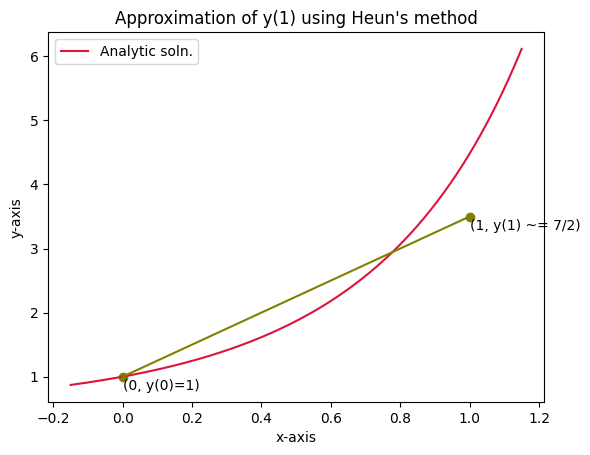

In [21]:
from sympy import dsolve, Eq, Function, Rational

x = Symbol('x')
y = Function('y')
diff_eq = Eq(y(x).diff(x), (x+1)*y(x))
analytic_sol = dsolve(diff_eq, y(x), ics={y(0): 1})
lambdified_analytic_sol = lambdify(x, analytic_sol.rhs, 'numpy')

start, end, delta_x = -0.15, 1.15, 1
x_vals = np.arange(start, end, 0.0001)
rk_ex_true_vals = lambdified_analytic_sol(x_vals)
y_0 = 1
y_1_heun_approx = Rational(7/2)

plt.plot(x_vals, rk_ex_true_vals, label='Analytic soln.', color='crimson')
plt.scatter([0, 1], [y_0, y_1_heun_approx], color='olive')
plt.plot([0, 1], [y_0, y_1_heun_approx], color='olive')
plt.annotate('(0, y(0)=1)', (0, y_0 - 0.2))
plt.annotate('(1, y(1) ~= 7/2)', (1, y_1_heun_approx - 0.2))

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Approximation of y(1) using Heun\'s method')
plt.legend()


In this case, Heun's method does not provide a very good approximation: the relative error is $\frac{|\frac{7}{2}-e^{\frac{3}{2}}|}{e^{\frac{3}{2}}} \approx 0.219$.
And again, because further iterations of Heun's method depend on this approximation, error will accumulate quickly and the resulting numerical solution will be inaccurate.
So let's try a different approach that uses the average of $\frac{dy}{dx}$ computed at a couple more points on the interval $[0, 1]$.

First, let's re-denote our differential equation as a function $f$ of $x$ and $y(x)$:
$$
\frac{dy}{dx}(x) = (x+1)y(x) = f(x, y(x))
$$
Then let's compute the value of $\frac{dy}{dx}$ at $x = 0$, and denote this value $k_1$:
$$
k_1 = \frac{dy}{dx}(0) = (0+1)1 = 1
$$
Next let's approximate the value of $\frac{dy}{dx}$ at $x = \frac{1}{2}$, and denote this value $k_2$:
$$
k_2 = \frac{dy}{dx}\bigg(\frac{1}{2}\bigg) = 
f\bigg(\frac{1}{2}, y\bigg(\frac{1}{2}\bigg)\bigg)
$$
However, we don't know the true value of $y(1/2)$.
So instead, we approximate it:
$$
y\bigg(\frac{1}{2}\bigg) \approx y(0) + \frac{1}{2}k_1 = \frac{3}{2}
$$
and then we use this approximation instead:
$$
k_2 = f\bigg(\frac{1}{2}, \frac{3}{2}\bigg) = \bigg(\frac{1}{2}+1\bigg)\frac{3}{2} = \frac{9}{4}
$$
However, our approximation of $y(\frac{1}{2})$ is exactly that: an approximation.
And because we used it to calculate $k_2$, the presence of error in our approximation of $y(\frac{1}{2})$ may mean that $k_2$ is not a very accurate approximation of $\frac{dy}{dx}$ at $x = \frac{1}{2}$.
To remedy this, let's try to compute **another** approximation of $y(\frac{1}{2})$.
Recall that our first approximation of $y(\frac{1}{2})$ used $k_1$, the value of $\frac{dy}{dx}$ at $x = 0$.
This approximation will be good if the magnitude of $\frac{dy}{dx}$ does not change very much on the interval $(0, \frac{1}{2})$.
But if it does, this approximation will be inaccurate.
So for our second approximation, we may wish to use the value of $\frac{dy}{dx}$ at $x = \frac{1}{2}$, of which $k_2$ is an approximation.
So this time, we use $k_2$ **instead of** $k_1$:
$$
y\bigg(\frac{1}{2}\bigg) \approx y(0) + \frac{1}{2}k_2 = 
1 + \bigg(\frac{1}{2}\bigg)\frac{9}{4} = \frac{17}{8}
$$
Now, using this second approximation of $y(\frac{1}{2})$, let's calculate another approximation of $\frac{dy}{dx}$ at $x = \frac{1}{2}$, and denote this value $k_3$:
$$
k_3 = f\bigg(\frac{1}{2}, \frac{17}{8}\bigg) = \bigg(\frac{1}{2} + 1\bigg)\frac{17}{8} = \frac{51}{16}
$$
Finally, we approximate the value of $\frac{dy}{dx}$ at $x = 1$, and denote this value $k_4$:
$$
k_4 = f(1, y(1))
$$
However, once again, we must compute an approximation of $y(1)$ because we do not know its true value.
Note that $k_3$ is an approximation of the value of $\frac{dy}{dx}$ at the point $x = \frac{1}{2}$, which lies halfway between $x = 0$ and $x = 1$.
Thus we can use $k_3$ to approximate $y(1)$ in the following way:
$$
y(1) \approx y(0) + \Delta x k_3 = 1 + 1\frac{51}{16} = \frac{67}{16}
$$
and then we use this approximation to compute $k_4$:
$$
k_4 = f(1, \frac{67}{16}) = (1 + 1)\frac{67}{16} = \frac{67}{8}
$$
In summary, we have computed one approximation of $\frac{dy}{dx}$ at $x = 0$ (which is $k_1$), we have computed two approximations of $\frac{dy}{dx}$ at $x = \frac{1}{2}$ ($k_2$ and $k_3$), and we have computed one approximation of $\frac{dy}{dx}$.

Now let's use a weighted average of these four approximations of $\frac{dy}{dx}$ to compute our final approximation of $y(1)$:
$$
y(1) \approx y(0) + 1 \frac{k_1 + 2k_2 + 2k_3 + k_4}{6} = \frac{35}{8} = 4.375
$$
Let's compare this new approximation with both the analytical solution and our approximation computed using an iteration of Heun's method:

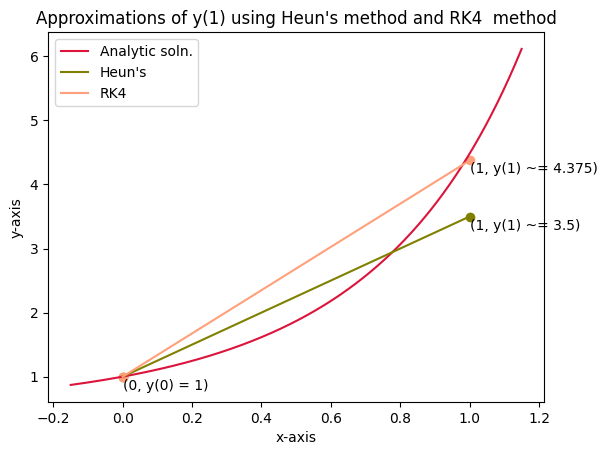

In [22]:
y_1_rx_approx = 35/8
# Heun's approximation of y(1)
plt.plot(x_vals, rk_ex_true_vals, label='Analytic soln.', color='crimson')
plt.scatter([0, 1], [y_0, y_1_heun_approx], color='olive')
plt.plot([0, 1], [y_0, y_1_heun_approx], color='olive', label='Heun\'s')
plt.annotate('(1, y(1) ~= 3.5)', (1, y_1_heun_approx - 0.2))

# Improved approximation of y(1)
plt.scatter([0, 1], [y_0, y_1_rx_approx], color='lightsalmon')
plt.plot([0, 1], [y_0, y_1_rx_approx], color='lightsalmon', label='RK4')
plt.annotate('(1, y(1) ~= 4.375)', (1, y_1_rx_approx - 0.2))
plt.annotate('(0, y(0) = 1)', (0, y_0 - 0.2))

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Approximations of y(1) using Heun\'s method and RK4  method')
plt.legend()


Clearly, this new approximation is much better than that provided by Heun's method:
the relative error is $\frac{|4.375 - e^{\frac{3}{2}}|}{e^{\frac{3}{2}}} \approx 0.0238$, whereas the relative error produced by Heun's method was approximately $0.219$.
By using a weighted average of several approximations of $\frac{dy}{dx}$ within the $\Delta x$ interval, we have significantly improved the accuracy of our approximation relative to Heun's method without decreasing our step size.

This technique is known as the classic Runge-Kutta method (pronounced "roon-guh koot-tuh", more or less), often shortened to "RK4".
Sometimes, this particular method is referred to as just "the Runge-Kutta method".
However, there are many variations of this method, and they are often referred to collectively as "the Runge-Kutta methods".

In general, the classic Runge-Kutta method is as follows:

Suppose we are given the differential equation and initial condition
$$
\frac{dy}{dx} = f(x, y(x)), \hspace{5mm}  y(x_0) = y_0
$$
we use a step size of $\Delta x$, and we denote $x_i = x_0 + i\times \Delta x$ and $y_i$ as our approximation of $y(x_i)$ for $i = 1, 2, 3, \dots$.
The approximation $y_{i+1}$ is given by the formula
$$
y_{i+1} = y_i + \Delta x \frac{(k_1 + 2k_2 + 2k_3 + k_4)}{6}
$$
where:
$$
k_1 = f(x_i, y_i)
$$
$$
k_2 = f \bigg(x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2}k_1\bigg)
$$
$$
k_3 = f\bigg(x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2}k_2\bigg)
$$
$$
k_4 = f\bigg(x_i + \Delta x, y_i + \Delta x k_3\bigg)
$$

Let's use the classic Runge-Kutta method to numerically solve the Schrodinger equation for the scenario described earlier (the one-dimensional particle-in-a-box problem, with initial conditions $\psi(0) = 0, \frac{d\psi}{dx}(0) = \pi\sqrt{2}$, letting $n = 1$ and thus $k = \pi$ and using a step size of $\Delta x = 0.1$ on the interval $(0, 1)$.)
However, the classic Runge-Kutta method solves first-order differential equations, and in this scenario the Schrodinger equation is second-order.
Thus, just as before, we must transform our second-order differential equation into a system of first-order differential equations:
(Note that here, we use the letter $p$ to denote estimates of $\frac{d\psi}{dx}$ and $\frac{d^2\psi}{dx^2}$ instead of $k$ as above, to avoid confusion with the wavenumber $k$ of a particle.)
$$
\psi(x_{i+1}) = \psi(x_i) + \Delta x \frac{(p_{11} + 2p_{12} + 2p_{13} + p_{14})}{6} \hspace{5mm}
\frac{d\psi}{dx}(x_{i+1})  = \frac{d\psi}{dx}(x_i) + \Delta x \frac{(p_{21} + 2p_{22} + 2p_{23} + p_{24})}{6}
$$

$$
p_{11} = \frac{d\psi}{dx}(x_i, \psi(x_i)) \hspace{5mm}
p_{21} = \frac{d^2\psi}{dx^2}(x_i, \frac{d\psi}{dx}(x_i))
$$

$$
p_{12} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2}, \psi(x_i) + \frac{\Delta x}{2}p_{11}) \hspace{5mm}
p_{22} = \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}, \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{21})
$$

$$
p_{13} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2}, \psi(x_i) + \frac{\Delta x}{2}p_{12}) \hspace{5mm}
p_{23} = \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}, \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{22})
$$

$$
p_{14} = \frac{d\psi}{dx}(x_i + \Delta x, \psi(x_i) + \Delta x p_{13}) \hspace{5mm}
p_{24} = \frac{d^2\psi}{dx^2}(x_i + \Delta x, \frac{d\psi}{dx}(x_i) + \Delta x p_{23})
$$
and then insist that we are given an initial value not only for $\psi(x_0)$ but also for $\frac{d\psi}{dx}(x_0)$.

So in  order to perform an iteration of the classic Runge-Kutta method, we first obtain $p_{11}$.
Note that we will never have to compute this value during the iteration:
if we are performing the first iteration (meaning that $i = 0$) then we use the value of $\frac{d\psi}{dx}(x_0)$ that we were given as an initial condition.
If we are performing a subsequent iteration (meaning that $i \geq 1$) then we use the value of $\frac{d\psi}{dx}(x_i)$ computed during the previous iteration.

Next we compute 
$$
p_{12} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2}, \psi(x_i) + \frac{\Delta x}{2}p_{11})
$$
Unfortunately, we don't know the exact value of $\frac{d\psi}{dx}$ at this point.
So, just as before, we instead compute an approximation of its value.
Note that, because $p_{11}$ is an approximation of $\frac{d\psi}{dx}(x_i)$, then $\psi(x_i) + \frac{\Delta x}{2}p_{11}$ is simply an approximation of $\psi(x_i + \frac{\Delta x}{2})$.
And, since $\psi$ is a function of $x$, it is **incredibly** trivial to say that $\psi(x) = \psi(x_i + \frac{\Delta x}{2})$ whenever $x = x_i + \frac{\Delta x}{2}$.
Using this knowledge, we simplify our expression for $p_{12}$:
$$
p_{12} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})
$$
Now that  we've done a bit of simplification, we make our approximation:
$$
p_{12} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2}) \approx
\frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}\frac{d^2\psi}{dx^2}(x_i) =
\frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}(-k^2)\psi(x_i)
$$
We know the value of $\frac{d\psi}{dx}(x_i)$ (either because $i = 0$ and we are using our initial condition or because $i \geq 1$ and we are using the value we computed in the previous iteration) and we also know the value of $\psi(x_i)$ (for the same reasons we just stated.)
Thus, we compute and use this value for $p_{12}$.

Next we try to compute
$$
p_{13} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2}, \psi(x_i) + \frac{\Delta x}{2}p_{12})
$$
Again, we don't know the exact value of $\frac{d\psi}{dx}$ at this point, so we must compute an approximation of its value.
Note that $p_{12}$ is an approximation of $\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$, **not** an approximation of $\frac{d\psi}{dx}(x_i)$.
However, $\Delta x$ is probably small enough that $\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$ and $\frac{d\psi}{dx}(x_i)$ have similar values.
That is,
$$
\psi(x_i) + \frac{\Delta x}{2}p_{12} \approx \psi(x_i) + \frac{\Delta x}{2}\frac{d\psi}{dx}(x_i) \approx \psi(x_i + \frac{\Delta x}{2})
$$
If we accept this approximation, then we can simplify our expression for $p_{13}$ in the same way that we did for $p_{12}$:
$$
p_{13} = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})
$$
Theoretically, we **could** approximate $p_{13}$ using the formula $\frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}\frac{d^2\psi}{dx^2}(x_i)$.
However, this is the exact same formula we used to approximate $p_{12}$!
And recall that we theorized we could improve the accuracy of numerical solutions computed using the Runga-Kutta method by computing $\frac{d\psi}{dx}$ at **different** points within the $\Delta x$ interval.
So with this in mind, let's try a different approach to computing $p_{13}$.
It should be easy to conclude from our discussion on Heun's method that (as we discussed in our earlier Runge-Kutta method example) instead of approximating the value of a function at a point using the formula
$$
f(x_i + \Delta x) \approx f(x_i) + \Delta x \frac{df}{dx}(x_i)
$$
we could alternatively use the formula
$$
f(x_i + \Delta x) \approx f(x_i) + \Delta x \frac{df}{dx}(x_i + \Delta x)
$$
(One of these approximations will usually be more accurate than the other, but which one is more accurate depends on the behavior of $f$.)
So to obtain a value distinct from $p_{12}$, let's use this formula to compute $p_{13}$:
$$
p_{13} = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})
$$
Now we've encountered another problem:
we know the value of $\frac{d\psi}{dx}(x_i)$, but we do not know the value of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})$.
We could try simplifying using our differential equation:
$$
\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}) = (-k^2)\psi(x_i + \frac{\Delta x}{2})
$$
but this also doesn't help us, because we don't know the value of $\psi(x_i + \frac{\Delta x}{2})$ either.
So how can we obtain an approximation for the value of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})$?

This is where the second equation in our system of first-order differential equations comes into play.
Consider our equation for $p_{22}$:
$$
p_{22} = \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}, \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{21})
$$
Note that, because $p_{21}$ is an approximation of $\frac{d^2\psi}{dx^2}(x_i)$, then $\frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{21}$ is simply an approximation of $\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$.
And again, since $\frac{d\psi}{dx}$ is a function of $x$, it is **incredibly** trivial to say that $\frac{d\psi}{dx}(x) = \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$ whenever $x = x_i + \frac{\Delta x}{2}$.
With this in mind, we simplify our expression for $p_{22}$:
$$
p_{22} = \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}) = (-k^2)\psi(x_i + \frac{\Delta x}{2})
$$
However, we don't know the value of $\psi(x_i + \frac{\Delta x}{2})$, so we must make yet another approximation.
Recalling that $p_{11}$ is an approximation of $\frac{d\psi}{dx}(x_i)$, we let
$$
p_{22} = (-k^2)\psi(x_i + \frac{\Delta x}{2}) \approx (-k^2)\bigg(\psi(x_i) + \frac{\Delta x}{2}p_{11}\bigg)
$$
Now that we have this approximation $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}) = p_{22}$, we can finally compute $p_{13}$:
$$
p_{13} = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{22}
$$


Now we try to compute
$$
p_{14} = \frac{d\psi}{dx}(x_i + \Delta x, \psi(x_i) + \Delta x p_{13})
$$
Once again, we don't know the exact value of $\frac{d\psi}{dx}$ at this point, so we must compute an approximation of its value.
Note that $p_{13}$  is an approximation of $\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$.
Additionally, note that, based on our discussion of the motivation behind Euler's method, (as we discussed in our earlier Runge-Kutta method example) the value of a function at a point can be approximated using the formula
$$
f(x_{i+1}) \approx f(x_i) + \frac{\Delta x}{2}\frac{df}{dx}\bigg(\frac{x_{i+1} + x_i}{2}\bigg) = 
f(x_i) + \frac{\Delta x}{2} \frac{df}{dx}\bigg(x_i + \frac{\Delta x}{2}\bigg)
$$
We refer to this as the "midpoint approximation formula".
With this in mind, we see that $\psi(x_i) + \Delta x p_{13}$ is simply an approximation of $\psi(x_{i+1}) = \psi(x_i + \Delta x)$ using an approximation of $\frac{d\psi}{dx}$ halfway between $x_i$ and $x_{i+1}$.
That is,
$$
\psi(x_{i+1}) = \psi(x_i + \Delta x) \approx \psi(x_i) + \Delta x p_{13}
$$
If we accept this approximation, then we can simplify our expression for $p_{14}$ in the same way that we did for $p_{12}$, $p_{13}$ and $p_{22}$:
$$
p_{14} = \frac{d\psi}{dx}(x_{i+1}) = \frac{d\psi}{dx}(x_i + \Delta x)
$$
Once again, we don't know the actual value of $\frac{d\psi}{dx}(x_i + \Delta x)$, so we must again compute an approximation.
Since we already saw a midpoint approximation formula in our expression for $p_{14}$, let's try to use another one here:
$$
\frac{d\psi}{dx}(x_i + \Delta x) \approx \frac{d\psi}{dx}(x_i) + \Delta x \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})
$$
Recall that we have already computed $p_{22}$, which is an approximation of the value of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})$.
However, for the same reason that we used different approximations to compute $p_{12}$ and $p_{13}$, we would like to use a different approximation to compute $p_{14}$.
But how can we obtain a different approximation of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})$?

Once again, we make use of the second equation in our system.
Consider our equation for $p_{23}$:
$$
p_{23}  = \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}, \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{22})
$$
and recall that $p_{22}$ is an approximation of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})$.
Recalling the alternative formula for approximation that we introduced while calculating $p_{13}$, we have
$$
\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2}) \approx 
\frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}) \approx
\frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{22}
$$
If we accept this approximation, then we can simplify  our expression for $p_{23}$ in the same way that we did for $p_{12}$, $p_{13}$, $p_{22}$ and $p_{14}$:
$$
p_{23} = \frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}) = (-k^2)\psi(x_i + \frac{\Delta x}{2})
$$
Once again, we could compute $p_{23}$ using the same formula and approximation we used for $p_{22}$, but for reasons already discussed, we do not want to do this;
we want to use a different approximation of $\psi(x_i + \frac{\Delta x}{2})$ instead.
Recalling that $p_{12}$ is an approximation of $\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$, and recalling the alternative formula for approximation that we used while calculating $p_{13}$, we can use the following approximation:
$$
\psi(x_i + \frac{\Delta x}{2}) \approx \psi(x_i) + \frac{\Delta x}{2}p_{12}
$$
and therefore 
$$
p_{23} = (-k^2)\bigg(\psi(x_i) + \frac{\Delta x}{2}p_{12}\bigg)
$$
Now that we have this second approximation of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2}) = p_{23}$, we can finally compute $p_{14}$:
$$
p_{14} = \frac{d\psi}{dx}(x_i) + \Delta x p_{23}
$$

Finally, we must compute
$$
p_{24} = \frac{d\psi}{dx}(x_i + \Delta x, \frac{d\psi}{dx}(x_i) + \Delta x p_{23})
$$
Once again, we don't know the value of $\frac{d^2\psi}{dx^2}$ at this point, and we don't know the value of $\psi$ at this point either, so we must compute an approximation.
Note that $p_{23}$ is an approximation of $\frac{d^2\psi}{dx^2}(x_i + \frac{\Delta x}{2})$.
This means that $\frac{d\psi}{dx}(x_i) + \Delta x p_{23}$ is an approximation of $\frac{d\psi}{dx}(x_i + \Delta x)$ using the midpoint approximation formula.
If we accept this approximation, then we can simplify our expression for $p_{24}$ in the same  way that we have previously:
$$
p_{24} = \frac{d^2\psi}{dx^2}(x_i + \Delta x) = (-k^2)\psi(x_i + \Delta x)
$$
Yet again, we don't know the actual value of $\psi(x_i + \Delta x)$, so we must yet again compute an approximation.
Just as we did when computing $p_{14}$, we have already seen a midpoint approximation formula in our expression for $p_{24}$, so we use another one here:
$$
\psi(x_i + \Delta x) \approx \psi(x_i) + \Delta x \frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})
$$
Recalling that $p_{13}$ is an approximation of $\frac{d\psi}{dx}(x_i + \frac{\Delta x}{2})$, the equation above becomes
$$
\psi(x_i + \Delta x) \approx \psi(x_i) + \Delta x p_{13}
$$
allowing us to conclude
$$
p_{24} = (-k^2)\bigg(\psi(x_i) + \Delta x p_{13}\bigg)
$$

At last, we can now complete this iteration by computing
$$
\psi(x_{i + 1}) = \psi(x_i) + \Delta x \frac{(p_{11} + 2p_{12} + 2p_{13} + p_{14})}{6}
$$
and
$$
\frac{d\psi}{dx}(x_{i+1}) = \frac{d\psi}{dx}(x_i) + \Delta x \frac{(p_{21} + 2p_{22} + 2p_{23} + p_{24})}{6}
$$
So, to summarize, in order to complete this iteration (in this particular scenario in which we are solving the particle-in-a-box-problem) we computed the following in this order:
1. $p_{11} = \frac{d\psi}{dx}(x_i)$.
This requires no computation:
it is either the initial condition or the result of the previous iteration.
2. $p_{21} = (-k^2)\psi(x_i)$
3. $p_{12} = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}(-k^2)\psi(x_i) = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{21}$
4. $p_{22} = (-k^2)\big(\psi(x_i) + \frac{\Delta x}{2}p_{11}\big)$
5. $p_{13} = \frac{d\psi}{dx}(x_i) + \frac{\Delta x}{2}p_{22}$
6. $p_{23} = (-k^2)\big(\psi(x_i) + \frac{\Delta x}{2}p_{12}\big)$
7. $p_{14} = \frac{d\psi}{dx}(x_i) + \Delta x p_{23}$
8. $p_{24} = (-k^2)\big(\psi(x_i) + \Delta x p_{13}\big)$
9. $\psi(x_{i+1})$ using the formula above.
10. $\frac{d\psi}{dx}(x_{i+1})$ using the formula above.

The code below computes the numeric solution using the classic Runge-Kutta method and plots the result.
It also plots the analytic solution and the numeric solution previously computed using Heun's method, to allow for easy comparison of their accuracy. (You can change the  `n_val` variable to set the energy level for which the solution is computed, you can change the `L_val` variable to set the width of the box, and you can change the `delta_x` variable to change the step size used during calculation.)

In [23]:
def compute_rk4(start, end, delta_x, psi_0, d_dx_psi_0, k_val):
    x_vals = np.arange(start, end + delta_x, delta_x)
    psi_vals = np.zeros_like(x_vals)
    d_dx_psi_vals = np.zeros_like(x_vals)

    psi_vals[0] = psi_0
    d_dx_psi_vals[0] = d_dx_psi_0

    for index, x_val in enumerate(x_vals[1:], start=1):
        neg_k_val_sq = -(k_val)**2
        prev_psi = psi_vals[index-1]
        prev_d_dx_psi = d_dx_psi_vals[index-1]

        p_11 = prev_d_dx_psi
        p_21 = neg_k_val_sq * prev_psi
        p_12 = prev_d_dx_psi + (delta_x/2)*p_21
        p_22 = neg_k_val_sq*(prev_psi + (delta_x/2)*p_11)
        p_13 = prev_d_dx_psi + (delta_x/2)*p_22
        p_23 = neg_k_val_sq * (prev_psi + (delta_x/2)*p_12)
        p_14 = prev_d_dx_psi + delta_x*p_23
        p_24 = neg_k_val_sq*(prev_psi + delta_x*p_13)

        psi = prev_psi + (delta_x/6)*(p_11 + 2*p_12 + 2*p_13 + p_14)
        d_dx_psi = prev_d_dx_psi + (delta_x/6)*(p_21 + 2*p_22 + 2*p_23 + p_24)

        psi_vals[index] = psi
        d_dx_psi_vals[index] = d_dx_psi
    return (x_vals, psi_vals)


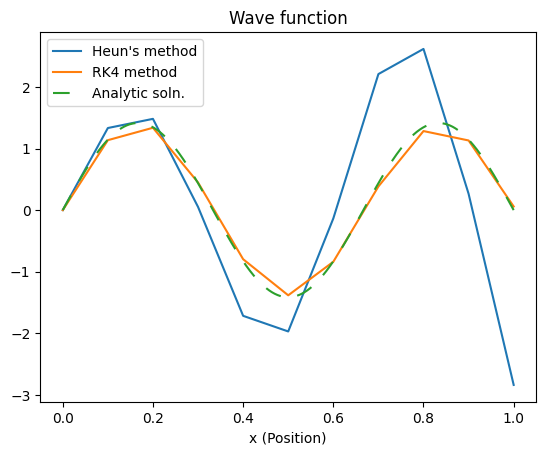

In [24]:
n_val = 3
L_val = 1
delta_x = 0.1
delta_x_for_actual = 0.0001

psi_0 = psi_expr.subs({L: L_val, n: n_val, x: 0}).evalf()
d_dx_psi_0 = diff(psi_expr, x).subs({L: L_val, n: n_val, x: 0}).evalf()

x_for_heun, heun_vals = compute_heun(
    0, L_val, delta_x, psi_0, d_dx_psi_0, n_val, L_val)
x_for_rk4, rk4_vals = compute_rk4(
    0, L_val, delta_x, psi_0, d_dx_psi_0, (n_val * pi / L_val))
x_for_actual, actual_vals = compute_psi(
    0, L_val, delta_x_for_actual, n_val, L_val)

plt.plot(x_for_heun, heun_vals, label='Heun\'s method')
plt.plot(x_for_rk4, rk4_vals, label='RK4 method')
plt.plot(x_for_actual, actual_vals, label='Analytic soln.',
         linestyle='--', dashes=(8, 8))

plt.xlabel('x (Position)')
plt.title('Wave function')
plt.legend()

Clearly, even with a relatively small step size of $\Delta x = 0.1$, the classic Runge-Kutta method is very accurate, even more so than Heun's method.

### SciPy's Runge-Kutta implementation

A modified version of the classic Runge-Kutta method described above (and thus a member of the family of explicit Runge-Kutta methods) known as the Dormand-Prince method has been proven to be more accurate than the classic Runge-Kutta method, and is included in SciPy.
The code below demonstrates its use:

**Note:** Some cells above this one must be executed in order to run the cells  below.
You can do this easily in VSCode/GitHub Codespaces by clicking the code cell below and then pressing the "Execute Above Cells" button on the top right edge of the cell, which is that with a right-pointing triangle and an upward-pointing arrow.

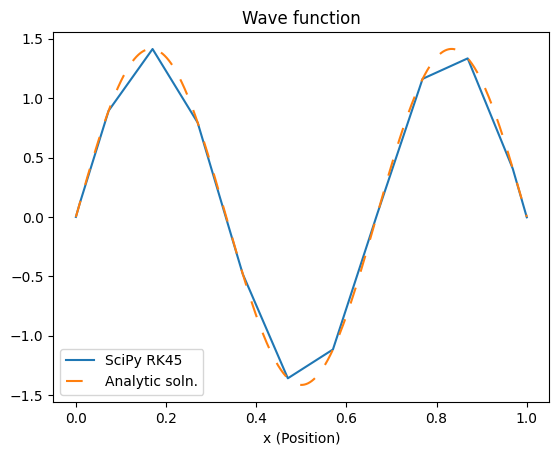

In [25]:
from scipy.integrate import solve_ivp

k_val = (n_val * pi / L_val)


def diff_eq_for_scipy(x, psi_and_d_psi_dx):
    # The first element in the list psi_and_d_psi_dx will be the
    # previous psi value, and the second will be the previous
    # d_psi_dx_value
    return [psi_and_d_psi_dx[1], -(k_val)**2 * psi_and_d_psi_dx[0]]


solution = solve_ivp(diff_eq_for_scipy, [0, L_val], [
                     psi_0, d_dx_psi_0], method='RK45', max_step=delta_x)

plt.plot(solution.t, solution.y[0, :], label='SciPy RK45')
plt.plot(x_for_actual, actual_vals, label='Analytic soln.',
         linestyle='--', dashes=(8, 8))

plt.xlabel('x (Position)')
plt.title('Wave function')
plt.legend()
